In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, optimizers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
housing_data = pd.read_csv('housing.csv')
housing_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
housing_data = housing_data.dropna()

In [4]:
train_data = housing_data.sample(frac = 0.8, random_state = 0)
test_data = housing_data.drop(train_data.index)

In [5]:
print(train_data.head(10))
print(test_data.head(10))

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
329   0.06724  0.0   3.24     0  0.460  6.333   17.2  5.2146    4  430.0   
371   9.23230  0.0  18.10     0  0.631  6.216  100.0  1.1691   24  666.0   
219   0.11425  0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276.0   
403  24.80170  0.0  18.10     0  0.693  5.349   96.0  1.7028   24  666.0   
78    0.05646  0.0  12.83     0  0.437  6.232   53.7  5.0141    5  398.0   
15    0.62739  0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307.0   
487   4.83567  0.0  18.10     0  0.583  5.905   53.2  3.1523   24  666.0   
340   0.06151  0.0   5.19     0  0.515  5.968   58.5  4.8122    5  224.0   
310   2.63548  0.0   9.90     0  0.544  4.973   37.8  2.5194    4  304.0   
102   0.22876  0.0   8.56     0  0.520  6.405   85.4  2.7147    5  384.0   

     PTRATIO       B  LSTAT  MEDV  
329     16.9  375.21   7.34  22.6  
371     20.2  366.15   9.53  50.0  
219     16.4  393.74  10.50  23.0  
403     20.2  396.9

In [6]:
age_train = train_data['AGE']
tax_train = train_data['TAX']
age_test = test_data['AGE']
tax_test = test_data['TAX']

In [7]:
age_train_np = np.array(age_train)

age_normalizer = layers.Normalization(input_shape = [1,], axis = None)
age_normalizer.adapt(age_train_np)

In [8]:
age_model = Sequential([
    age_normalizer,
    layers.Dense(units = 1)
])

age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 1)                 3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [9]:
age_model.compile(
    optimizer = optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [10]:
history = age_model.fit(
    age_train,
    tax_train,
    epochs = 1000,
    verbose = 0,
    validation_split = 0.2
)

In [11]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,val_loss
995,113.331528,133.781372
996,113.327377,133.674652
997,113.341545,133.616104
998,113.340431,133.660324
999,113.334404,133.678650


In [12]:
model_eval = {}
model_eval['age_model_result'] = age_model.evaluate(
    age_test,
    tax_test,
    verbose = 0
)

In [13]:
x = tf.linspace(0.0, 100, 101)
y = age_model.predict(x)

4/4 [==============================] - 0s 668us/step


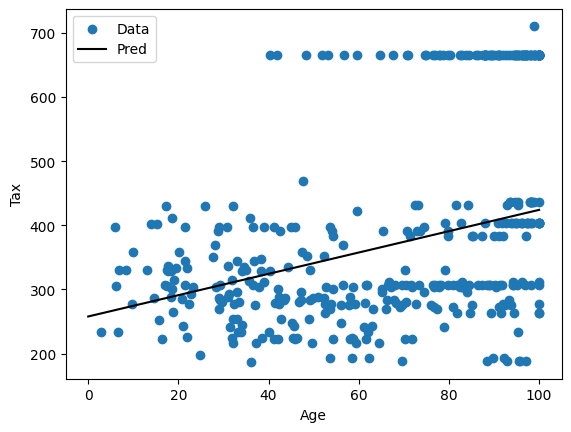

In [14]:
plt.scatter(age_train, tax_train, label = 'Data')
plt.plot(x, y, color = 'k', label = 'Pred')
plt.xlabel('Age')
plt.ylabel('Tax')
plt.legend()
plt.show()

In [15]:
model_eval

{'age_model_result': 137.31236267089844}

In [16]:
x_test = [62, 12, 37]
y_test = age_model.predict(x_test)

1/1 [==============================] - 0s 27ms/step


In [17]:
test_dict = {}
test_dict['AGE'] = np.array(x_test)
test_dict['TAX'] = np.array(y_test)

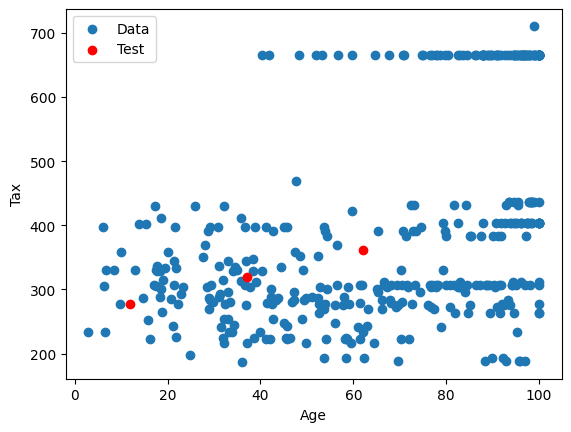

In [18]:
plt.scatter(age_train, tax_train, label = 'Data')
plt.scatter(x_test, y_test, color = 'r', label = 'Test')
plt.xlabel('Age')
plt.ylabel('Tax')
plt.legend()
plt.show()